In [1]:
import numpy as np
import pandas as pd
import os 
import seaborn as sns
import re as re
import matplotlib.pyplot as plt
import ast as ast 
import matplotlib.patches as mpatches
from pathlib import Path

from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager as font_manager
import matplotlib as mpl
from matplotlib.ticker import StrMethodFormatter
import pylab as pylab 
sns.set_context("notebook", rc={"lines.linewidth": 3})

mpl.rcParams['font.family'] = 'Arial'

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

color_dict = {'0': 'hotpink', '1':'firebrick', '2':'forestgreen', '3':'mediumslateblue'}

In [2]:
folder = r"F:\PERSONAL\Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Analysis"
#folder = r"F:\PERSONAL\Malina\NanoscopeII\mP_LastRound\Analysis"

In [3]:
with open(r"F:\PERSONAL\Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Sample_Conditions_wNewData_MKI.txt", "r") as data:
    #Load sample conditions dictionary 
    S_C = ast.literal_eval(data.read())

#get stage info
with open(r"F:\PERSONAL\Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\ClassificationOfNeuronDataByStage_wNewData_MKI.txt", "r") as data:
    #Load stages dictionary 
    stages_dict = ast.literal_eval(data.read())

In [4]:
def summ(df): 
    #Get the number of localisations plusin 
    df['Number_IN_w'] = df['PLUS_IN_w'].sum()
    #Get the total number of localisations
    df['Number_tot_w'] = df['PLUS_IN_w'].count()
    return df

def findmean(df):
    df['mean_loc'] = df['Number_IN_w'].sum() / df['Number_tot_w'].sum()
    df['loc_std']  = df['Number_IN_w'].std() / df['Number_tot_w'].std()
    df['loc_mean'] = df['Number_IN_w'].mean() / df['Number_tot_w'].mean()
    return df

In [5]:
def find_stage(entry, data_dict):
    for stage, entries_list in data_dict.items():
        if entry in entries_list:
            return stage
    return None  # Entry not found in any stage

In [6]:
dfm = pd.DataFrame()
for DIVs in os.listdir(folder):
    data = re.search('(20[\d_-]{8,9})_M', DIVs).group(1)
    div = re.search('DIV(\d)', DIVs).group(1)
    for ROIs in os.listdir(folder+'\\'+DIVs): 
        if os.path.isdir(folder+'\\'+DIVs+'\\'+ROIs):
            ROI = re.search('R\w{1,2}(\d)', ROIs).group(1)
            if ROI !='2':
                datadir = folder+'\\'+DIVs+'\\'+ROIs
                print(ROIs)
            
                df = pd.read_csv(datadir+'\\'+fr'DF_statitics_per_neurite_updated.csv')
                Sample_ID = data + '_' + div + '_' + ROIs.split('_R', 1)[0]
                df['Sample_ID'] = Sample_ID 
                print(Sample_ID)
                
                #get stage information
                stage = find_stage(Sample_ID, stages_dict)
                if stage == None:
                    print(f"Warning. No corresponding stage found for '{Sample_ID}'. Proceeding anyways.")
               
                df['DIV'] = div
                df['Stage'] = stage
                df['U_label'] = df['Sample_ID']+'_'+df['Neurite_label_new'].astype(str)
                df = df.groupby('U_label').apply(summ)
                df = df.groupby('U_label')[['Neurite_label', 'Neurite_label_new',\
                'Frac_Plusin_neurite', 'Frac_Plusin_fullneurite', 'Primary_section',\
                'Longest_neurite', 'DIV', 'Stage', 'Cell', 'Sample_ID','Number_tot_w', 'Number_IN_w', 'PLUS_IN_w']].max().reset_index()
                
                dfm = pd.concat([df, dfm])

S02_C01_ROI1
2022_10_31_0_S02_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S03_C01_ROI1
2022_11_01_1_S03_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_RO1
2022_11_07_0_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C01_RO1
2022_11_07_0_S02_C01
S01_C01_ROI1


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


2022_11_08_1_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2022_11_08_1_S01_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S03_C01_ROI1
2022_11_08_1_S03_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S03_C02_ROI1
2022_11_08_1_S03_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S04_C01_ROI1
2022_11_08_1_S04_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_ROI1
2022_11_09_2_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2022_11_09_2_S01_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C01_ROI1
2022_11_09_2_S02_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C02_ROI1
2022_11_09_2_S02_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S03_C01_ROI1
2022_11_09_2_S03_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S03_C02_ROI1
2022_11_09_2_S03_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_ROI1
2022_11_10_3_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2022_11_10_3_S01_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C01_ROI1
2022_11_10_3_S02_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C02_ROI1
2022_11_10_3_S02_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C01_ROI1
2022_11_14_0_S02_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_ROI1
2022_11_15_1_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2022_11_15_1_S01_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C01_ROI1
2022_11_15_1_S02_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_ROI1
2022_11_16_2_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S04_C01_ROI1
2022_11_16_2_S04_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S04_C02_ROI1
2022_11_16_2_S04_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_ROI1
2022_11_22_1_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2022_11_22_1_S01_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S03_C01_ROI1
2022_11_29_1_S03_C01
Warning. No corresponding stage found for '2022_11_29_1_S03_C01'. Proceeding anyways.


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_ROI1
2022_12_01_3_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_ROI1
2023-05-16_1_S01_C01
Warning. No corresponding stage found for '2023-05-16_1_S01_C01'. Proceeding anyways.


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2023-05-16_1_S01_C02
Warning. No corresponding stage found for '2023-05-16_1_S01_C02'. Proceeding anyways.


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C03_ROI1
2023-05-16_1_S01_C03
Warning. No corresponding stage found for '2023-05-16_1_S01_C03'. Proceeding anyways.


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C04_ROI1
2023-05-16_1_S01_C04
Warning. No corresponding stage found for '2023-05-16_1_S01_C04'. Proceeding anyways.


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C03_ROI1
2023-05-16_1_S02_C03
S01_C01_ROI1


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


2023-05-17_2_S01_C01
Warning. No corresponding stage found for '2023-05-17_2_S01_C01'. Proceeding anyways.


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2023-05-17_2_S01_C02
Warning. No corresponding stage found for '2023-05-17_2_S01_C02'. Proceeding anyways.


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C03_ROI1
2023-05-17_2_S01_C03


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C04_ROI1
2023-05-17_2_S01_C04


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C01_ROI1
2023-05-17_2_S02_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_ROI1
2023-06-21_2_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_ROI1
2023-07-10_0_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2023-07-10_0_S01_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C03_ROI1
2023-07-10_0_S01_C03


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C01_ROI1
2023-07-10_0_S02_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)
D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C02_ROI1
2023-07-10_0_S02_C02
S01_C01_ROI1
2023-07-11_1_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2023-07-11_1_S01_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C03_ROI1
2023-07-11_1_S01_C03


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S03_C03_ROI1
2023-07-11_1_S03_C03


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_ROI1
2023-07-12_2_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C03_ROI1
2023-07-12_2_S01_C03


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C01_ROI1
2023-07-12_2_S02_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C02_ROI1
2023-07-12_2_S02_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C04_ROI1
2023-07-12_2_S02_C04


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_ROI1
2023-08-28_0_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2023-08-28_0_S01_C02
Warning. No corresponding stage found for '2023-08-28_0_S01_C02'. Proceeding anyways.


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C03_ROI1
2023-08-28_0_S01_C03


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S03_C02_ROI1
2023-08-29_1_S03_C02
Warning. No corresponding stage found for '2023-08-29_1_S03_C02'. Proceeding anyways.


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S03_C04_ROI1
2023-08-29_1_S03_C04
S01_C01_ROI1


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


2023-08-30_2_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2023-08-30_2_S01_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C03_ROI1
2023-08-30_2_S01_C03
Warning. No corresponding stage found for '2023-08-30_2_S01_C03'. Proceeding anyways.


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S03_C01_ROI1
2023-08-30_2_S03_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S03_C03_ROI1
2023-08-30_2_S03_C03


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_ROI1
2023-08-31_3_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2023-08-31_3_S01_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C03_ROI1
2023-08-31_3_S01_C03


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C04_ROI1
2023-08-31_3_S01_C04


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C04_ROI1
2023-09-11_0_S01_C04
S01_C05_ROI1


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


2023-09-11_0_S01_C05
S01_C01_ROI1


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


2023-09-12_1_S01_C01
Warning. No corresponding stage found for '2023-09-12_1_S01_C01'. Proceeding anyways.
S02_C01_ROI1


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


2023-09-12_1_S02_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C03_ROI1
2023-09-12_1_S02_C03


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C04_ROI1
2023-09-12_1_S02_C04


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_ROI1
2023-09-13_2_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2023-09-13_2_S01_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C01_ROI1
2023-09-13_2_S02_C01
S02_C02_ROI1


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


2023-09-13_2_S02_C02
S02_C03_ROI1


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


2023-09-13_2_S02_C03
S01_C03_ROI1


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


2023-09-14_3_S01_C03


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C01_ROI1
2023-09-14_3_S02_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S03_C01_ROI1
2023-09-14_3_S03_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S04_C01_ROI1
2023-09-14_3_S04_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S05_C01_ROI1
2023-09-14_3_S05_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C03_ROI1
2023-09-18_0_S02_C03
S01_C01_ROI1


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


2023-09-20_2_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2023-09-20_2_S01_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C04_ROI1
2023-09-20_2_S01_C04


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C01_ROI1
2023-09-20_2_S02_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_ROI1
2023-09-28_3_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2023-09-28_3_S01_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C03_ROI1
2023-09-28_3_S01_C03
Warning. No corresponding stage found for '2023-09-28_3_S01_C03'. Proceeding anyways.


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_ROI1
2023-10-02_0_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2023-10-03_1_S01_C02
Warning. No corresponding stage found for '2023-10-03_1_S01_C02'. Proceeding anyways.


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C02_ROI1
2023-10-03_1_S02_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C03_ROI1
2023-10-03_1_S02_C03


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S03_C01_ROI1
2023-10-03_1_S03_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S03_C02_ROI1
2023-10-03_1_S03_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S03_C03_ROI1
2023-10-03_1_S03_C03


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2023-10-04_2_S01_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_ROI1
2023-10-05_3_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C02_ROI1
2023-10-05_3_S01_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C03_ROI1
2023-10-05_3_S01_C03


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C01_ROI1
2023-10-05_3_S02_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S03_C02_R01
2024-04-08_0_S03_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S03_C04_R01
2024-04-08_0_S03_C04


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S04_C01_R01
2024-04-08_0_S04_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S04_C02_R01
2024-04-08_0_S04_C02


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S04_C03_R01
2024-04-08_0_S04_C03


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S04_C04_R01
2024-04-08_0_S04_C04


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C01_R01
2024-04-09_1_S01_C01


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C03_R01
2024-04-09_1_S01_C03


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S01_C04_R01
2024-04-09_1_S01_C04


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C03_R01
2024-04-09_1_S02_C03


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


S02_C04_R01
2024-04-09_1_S02_C04


D:\Temp\14\ipykernel_34084\827932899.py:25: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('U_label').apply(summ)


                  U_label  Neurite_label  Neurite_label_new  \
0  2024-04-09_1_S02_C04_1              1                  1   
1  2024-04-09_1_S02_C04_2              2                  2   
0  2024-04-09_1_S02_C03_1              1                  1   
0  2024-04-09_1_S01_C04_1              1                  1   
1  2024-04-09_1_S01_C04_2              2                  2   

   Frac_Plusin_neurite  Frac_Plusin_fullneurite  Primary_section  \
0             0.087323                 0.087323             True   
1             0.270426                 0.270426             True   
0             0.531392                 0.531392             True   
0             0.456571                 0.456571             True   
1             0.434380                 0.434380             True   

   Longest_neurite DIV           Stage         Cell             Sample_ID  \
0             True   1    stage 2a noc  S02_C04_R01  2024-04-09_1_S02_C04   
1            False   1    stage 2a noc  S02_C04_R01  2024-

D:\Temp\14\ipykernel_34084\303435365.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Stage'] = df1['Stage'].astype('category')
D:\Temp\14\ipykernel_34084\303435365.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df1 = df1.groupby(['Stage']).apply(findmean)


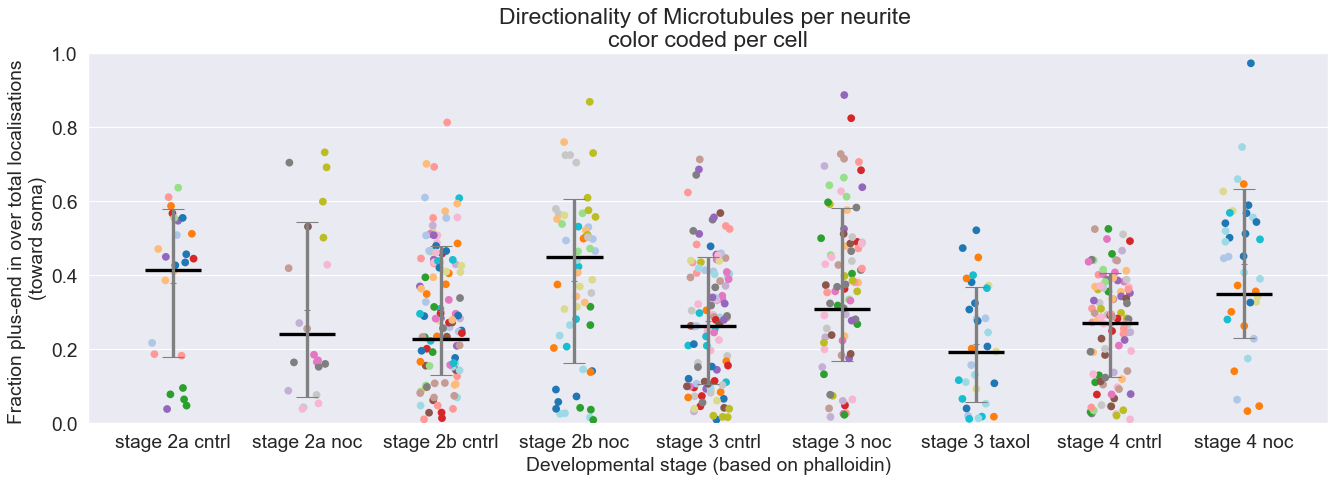

In [7]:
samples = [entry for entries_list in stages_dict.values() for entry in entries_list]
#print(samples)

with sns.axes_style("darkgrid", rc={'font': 'Arial'}):
    fig = plt.figure(figsize=(20, 6), dpi=80)

    df1 = dfm[dfm['Sample_ID'].isin(samples)]
    print(df1.head())
    
    df1['Stage'] = df1['Stage'].astype('category')
    df1 = df1.groupby(['Stage']).apply(findmean)

    sns.stripplot(x='Stage', y='Frac_Plusin_fullneurite', data=df1, hue='Sample_ID', palette='tab20', size=7, jitter=0.16)

    means = df1.groupby('Stage')['Frac_Plusin_fullneurite'].mean()
    e = df1.groupby('Stage')['Frac_Plusin_fullneurite'].std()
    x_values = range(len(means))
    plt.errorbar(x_values, means, e, linestyle='None', barsabove=True, fmt='_', color='gray',
                 markersize=6, capsize=10, zorder=100)

    df_mean = df1.groupby('Stage')['mean_loc'].mean()
    df_mean2 = df1.groupby('Stage')['loc_mean'].mean()
    df_std = df1.groupby('Stage')['loc_std'].mean()
    _ = [plt.hlines(y, i - 0.21, i + 0.21, zorder=10, color='k') for i, y in enumerate(df_mean.reset_index()['mean_loc'])]

    plt.title('Directionality of Microtubules per neurite \ncolor coded per cell')
    plt.legend([], [], frameon=False)
    plt.ylim(0, 1)
    plt.ylabel('Fraction plus-end in over total localisations \n(toward soma)')
    plt.xlabel('Developmental stage (based on phalloidin)')

    directory = r"F:\PERSONAL\Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Figures"
    fig.savefig(directory + fr'/Directionality of Microtubules div_wo loc average.png')
    df1.to_csv(directory + fr'/AllData.csv') 

    plt.show()

In [8]:
pal = sns.color_palette('gist_stern_r')
a = pal.as_hex()

D:\Temp\14\ipykernel_34084\2829267483.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Stage'] = df1['Stage'].astype('category')
D:\Temp\14\ipykernel_34084\2829267483.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df1 = df1.groupby(['Stage']).apply(findmean)
D:\Temp\14\ipykernel_34084\2829267483.py:10: UserWarning: 
The palette list has fewer values (6) than needed (103) and will cycle, w

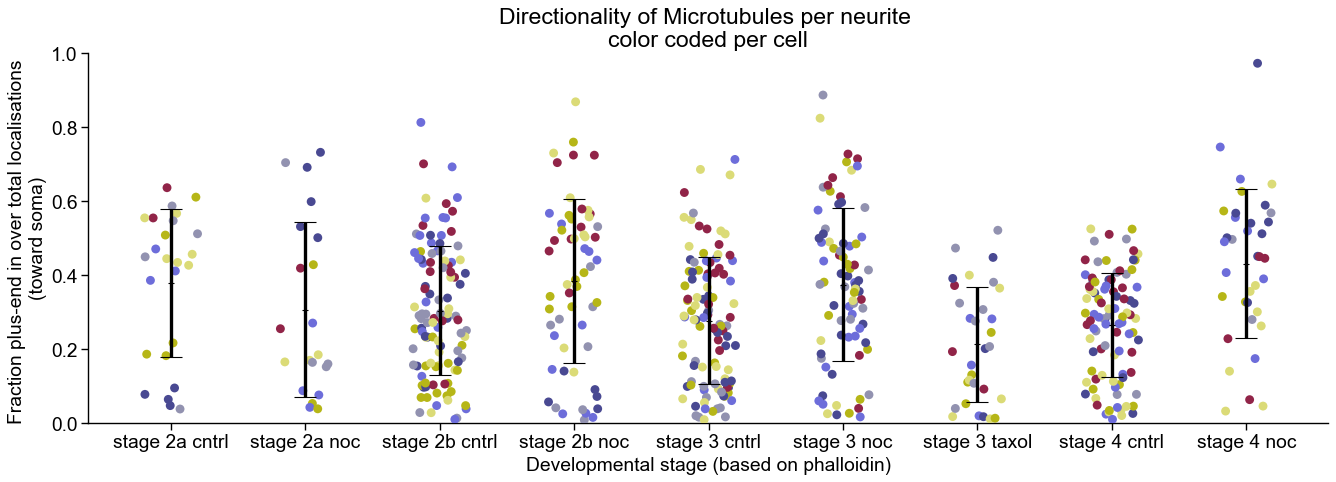

In [9]:
fig = plt.figure(figsize=(20, 6), dpi=80)

df1 = dfm[dfm['Sample_ID'].isin(samples)]

#df1 = df1.groupby(['Stage']).apply(findmean)
#df1['Stage'] = df1.Stage.astype(int)
df1['Stage'] = df1['Stage'].astype('category')
df1 = df1.groupby(['Stage']).apply(findmean)

sns.stripplot(x= df1.Stage, y=df1.Frac_Plusin_fullneurite, hue = df1.Sample_ID, palette = a, size=8, jitter=0.2)

means = df1.groupby('Stage', sort=False)['Frac_Plusin_fullneurite'].mean()
e = df1.groupby('Stage', sort=False)['Frac_Plusin_fullneurite'].std()
x_values = range(len(means))
plt.errorbar(x_values, means, e, linestyle='None', barsabove=True, fmt='_', color='k',\
             markersize=6, capsize=10, zorder=100)

df_mean = df1.groupby('Stage', sort=False)['mean_loc'].mean()
df_mean2 = df1.groupby('Stage', sort=False)['loc_mean'].mean()
df_std = df1.groupby('Stage', sort=False)['loc_std'].mean()

plt.title('Directionality of Microtubules per neurite \ncolor coded per cell')
plt.legend([],[], frameon=False)
plt.ylim(0,1)
plt.ylabel('Fraction plus-end in over total localisations \n(toward soma)')
plt.xlabel('Developmental stage (based on phalloidin)')

for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)

directory = r"F:\PERSONAL\Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Figures"
fig.savefig(directory+fr'/Directionality of Microtubules stage.png', transparent=True)
     
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\PROJECTS\\personal_Malina\\motorPaint\\YoungNeurons_Reanalyzed_Stage\\Figures/Directionality of Microtubules longest neurite.png'

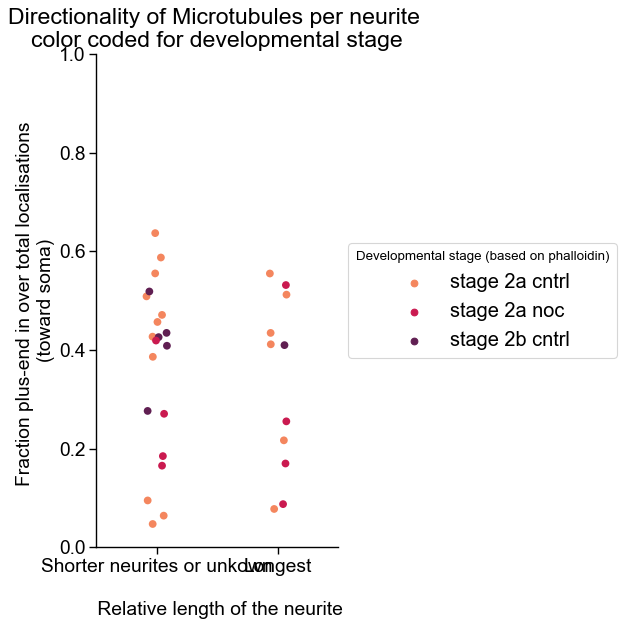

In [10]:
fig = plt.figure(figsize=(8, 8), dpi=80)

df1 = dfm[dfm['Sample_ID'].isin(samples)]
#df1['Stage'] = df1.Stage.astype(int)
df1['Stage'] = df1['Stage'].astype('category')

sns.stripplot(x=df1.Longest_neurite, y=df1.Frac_Plusin_fullneurite, hue=df1.Stage, palette="rocket_r", size=7)
#plt.xticks(x, labels)
plt.title('Directionality of Microtubules per neurite \ncolor coded for developmental stage')
plt.legend(title='Developmental stage (based on phalloidin)', bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, fontsize=18)
plt.ylim(0,1)
plt.xticks(ticks=[0,1], labels=['Shorter neurites or unkown', 'Longest'])
plt.ylabel('Fraction plus-end in over total localisations \n(toward soma)')
plt.xlabel(' \n Relative length of the neurite')
for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)
directory = r"E:\PROJECTS\personal_Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Figures"
plt.tight_layout()
fig.savefig(directory+fr'/Directionality of Microtubules longest neurite.png')
plt.show()

In [ ]:
#NEED TO FIX STILL!!!
with open(r"E:\PROJECTS\personal_Malina\motorPaint\SampleCond\Sample_Conditions_TAXOL.txt", "r") as data: #BRONTE HERE YOU PUT YOUR NOC FILE
    #Load sample conditions dictionary 
    S_CT = ast.literal_eval(data.read())
color_dict = {'0': 'hotpink', '1':'firebrick', '2':'forestgreen', '3':'mediumslateblue'}

samples_T = []
dfm['Taxol'] = False
for keys in S_CT: 
    print(keys)
    div = re.search('DIV(\d)_(\w+)', keys).group(1)
    if div == '0': 
        print('')
    else: 
        s = S_CT[keys]
        T = re.search('DIV(\d)_(\w+)', keys).group(2)
        if T == 'Taxol':
            dfm['Taxol'] = np.where(dfm['Sample_ID'].isin(s), True, dfm['Taxol']) 

        samples_T = s + samples_T
samples_T

D:\Temp\10\ipykernel_12184\1156473725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Stage'] = df2['Stage'].astype('category')
D:\Temp\10\ipykernel_12184\1156473725.py:8: UserWarning: 
The palette list has fewer values (6) than needed (41) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(x=df2.Stage, y=df2.Frac_Plusin_fullneurite, hue=df2.Sample_ID, palette=a, size=7)
D:\Temp\10\ipykernel_12184\1156473725.py:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To ad

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (12).

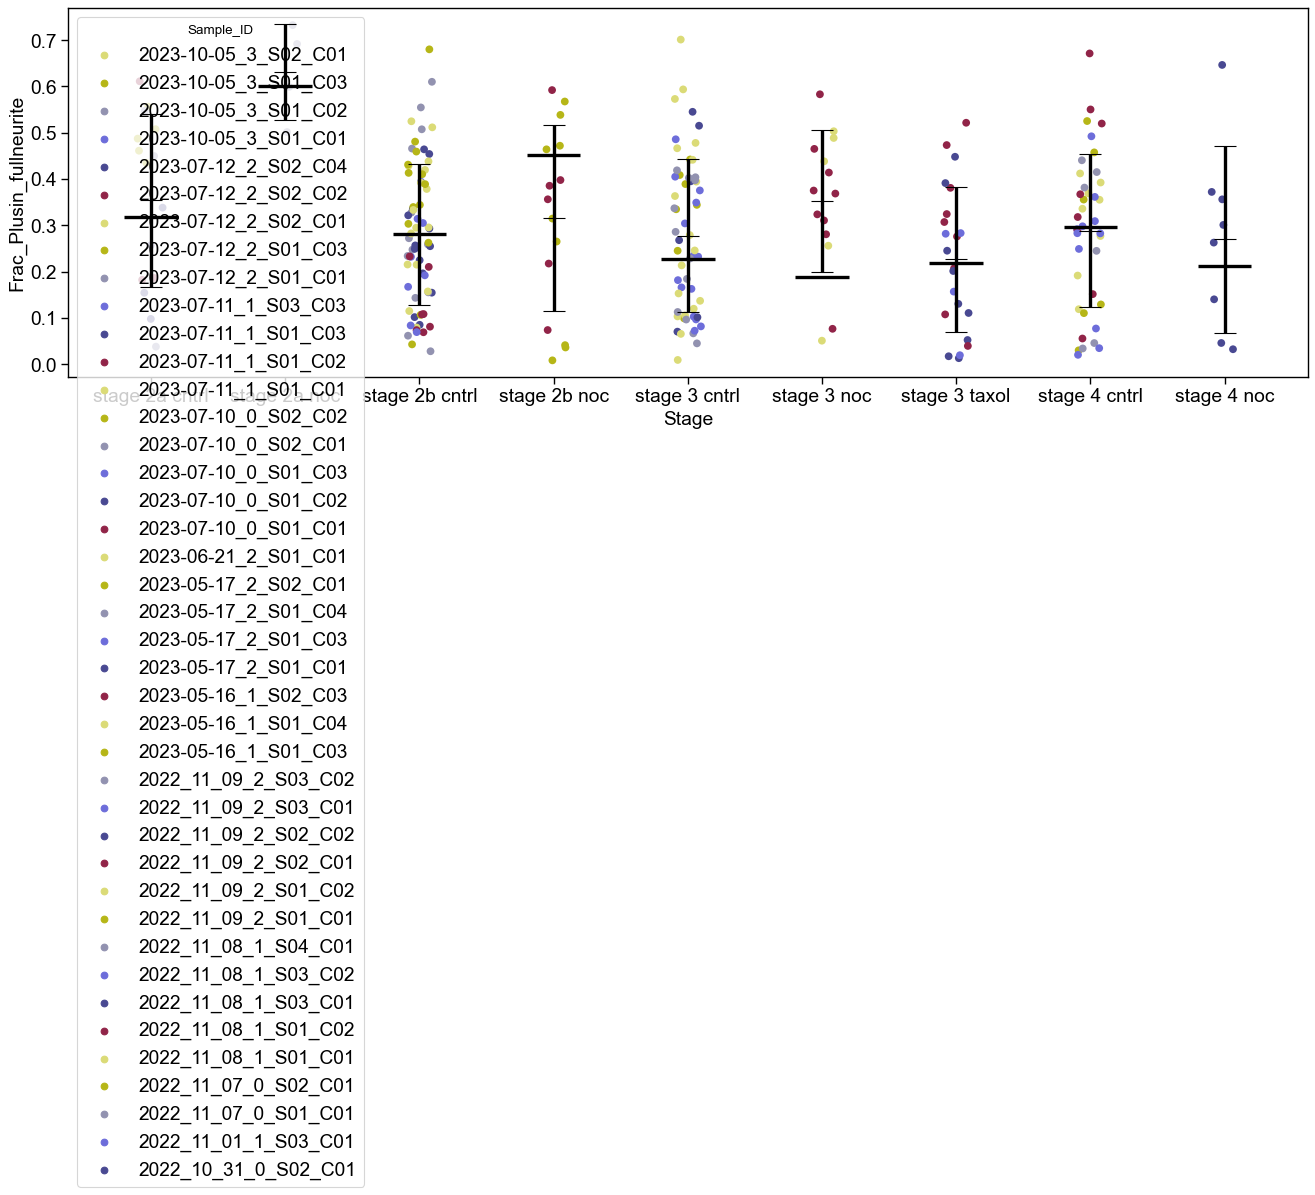

In [27]:
samples_drug = [entry for entries_list in stages_dict.values() for entry in entries_list]
fig = plt.figure(figsize=(20, 6), dpi=80)

df2 = dfm[dfm['Sample_ID'].isin(samples_drug)]
df2['Stage'] = df2['Stage'].astype('category')
#df2['DIV'] = df2['DIV'].astype(float)
#df2['DIV'] = np.where(df2.Taxol,df2['DIV']+0.5, df2['DIV'] )
sns.stripplot(x=df2.Stage, y=df2.Frac_Plusin_fullneurite, hue=df2.Sample_ID, palette=a, size=7)

df2 = df2.groupby(['Stage']).apply(findmean)

df_mean = df2.groupby('Stage', sort=False)['mean_loc'].mean()
_ = [plt.hlines(y, i-.2, i+.2, zorder=10, color='k') for i, y in df_mean.reset_index()['mean_loc'].items()]

means = df2.groupby('Stage', sort=False)['Frac_Plusin_fullneurite'].mean()
e = df2.groupby('Stage', sort=False)['Frac_Plusin_fullneurite'].std()
x_values = range(len(means))
plt.errorbar(x_values, means, e, linestyle='None', barsabove=True, fmt='_',color='k',\
             markersize=20, capsize=10, zorder=100)

plt.xticks(x_values, labels=stages_dict.keys())
plt.title('Directionality of Microtubules per neurite \n color coded by cell')
#plt.legend([],[], frameon=False)
plt.ylim(0,1)
plt.ylabel('Fraction plus-end in over total localisations \n(toward soma)')
plt.xlabel('Stages and treatment')

for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)

directory = r"E:\PROJECTS\personal_Malina\motorPaint\YoungNeurons_Reanalyzed_Stage\Figures"
fig.savefig(directory+fr'/Directionality of Microtubules TAXOL.png')

plt.show()

In [35]:
df2['S'] = df2.Sample_ID + df2.Longest_neurite.astype(str)
df2.S.unique()

NameError: name 'df2' is not defined

In [32]:
plt.figure(figsize=(4,6), dpi=80)
df1 = dfm[dfm['Condition'] != 'Taxol']

x = [0, 1, 2, 3]

labels = [0, 1, 2, 3]

sns.scatterplot(x= df1.Stage, y=df1.Frac_Plusin_fullneurite, hue=df1.Longest_neurite)
plt.xticks(x, labels)
plt.title('Directionality of microtubules per neurite')
plt.legend(title='Longest Neurite')
plt.ylim(0, 1)
plt.ylabel('Fraction localisations toward soma')

KeyError: 'Condition'

<Figure size 320x480 with 0 Axes>

In [37]:
plt.figure(figsize=(4,6), dpi=80)
df1 = dfm[dfm['Condition'] != 'Taxol']

x = [0, 1, 2, 3]

labels = [0, 1, 2, 3]

sns.scatterplot(x= df1.Stage, y=df1.Frac_Plusin_fullneurite, hue=df1.Cell)
plt.xticks(x, labels)
plt.title('Directionality of Microtubules per neurite \ncolor coded per cell')
plt.legend([], [], frameon=False)
plt.ylim(0, 1)
plt.ylabel('Fraction localisations toward soma')

KeyError: 'Condition'

<Figure size 320x480 with 0 Axes>

In [38]:
plt.figure(figsize=(4,6), dpi=80)
df2 = dfm[dfm['Condition'] == 'Taxol']
x = [1, 2, 3]
labels = [1, 2, 3]
sns.scatterplot(x=df2.Stage, y=df2.Frac_Plusin_fullneurite, hue=df2.Longest_neurite)
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.legend(title='Longest Neurite')
plt.title('Taxol treated')
plt.ylabel('Fraction localisations toward soma')

KeyError: 'Condition'

<Figure size 320x480 with 0 Axes>

In [39]:
plusin_over_total=dfs.groupby(dfs.Neurite_label)['PLUS_IN_w'].sum()/dfs.groupby(dfs.Neurite_label)['PLUS_IN_w'].count()

mean_in_total = round((dfs['PLUS_IN_w'].sum()/dfs['PLUS_IN_w'].count())*100,2)
#print('Percentage plus end in over total', round((dfs['PLUS_IN_w'].sum()/dfs['PLUS_IN_w'].count())*100,2), '%')

plt.figure(figsize=(5,6), dpi=80)

ar = plusin_over_total.to_numpy()
ar = ar * 100
print('Mean of neurites', ar.mean())
plt.plot(len(ar)*[1],ar, 'o', color='darkgreen')
plt.ylabel('% Plus end toward soma')
plt.axhline(y=ar.mean(), xmin=0.42, xmax=0.58, label='Mean of neurites', color='firebrick' )
plt.axhline(y=mean_in_total, xmin=0.42, xmax=0.58, label='Mean of all localisations', color='cornflowerblue')
plt.ylim([0,100])
plt.legend()
plt.title('Relative directionality of motor localisations \n per neurite section')
plt.xticks([])
plt.xlabel(f'Average plus end inward over total {mean_in_total}%')
plt.savefig(datadir+"//"+"Plus_in_toward_soma_agg_neurites.PNG")
plt.show()

NameError: name 'dfs' is not defined

In [ ]:
'''
IDs = list(S_C.keys())
dfm['Time'] = np.nan
samples = []
for i in range(0,len(IDs)): 
    s = S_C[IDs[i]]
    #print(s)
    if i==0: 
        dfm['Time'] = np.where(dfm['Sample_ID'].isin(s), 6, dfm['Time'])
        #print(i)
        print(dfm.head())
        print(dfm['Sample_ID'])
    #elif i==1: # BRONTE WHEN YOU HAVE ALL YOUR SAMPLES, UNCOMMENT THESE
    #    dfm['Time'] = np.where(dfm['Sample_ID'].isin(s), 24, dfm['Time']) 
    #elif i==2: 
    #    dfm['Time'] = np.where(dfm['Sample_ID'].isin(s), 28, dfm['Time'])
    #elif i==3: 
    #    dfm['Time'] = np.where(dfm['Sample_ID'].isin(s), 48, dfm['Time']) 
    #elif i==4: 
    #    dfm['Time'] = np.where(dfm['Sample_ID'].isin(s), 52, dfm['Time'])
    #elif i==5: 
    #    dfm['Time'] = np.where(dfm['Sample_ID'].isin(s), 72, dfm['Time']) 
    #elif i==6: 
    #    dfm['Time'] = np.where(dfm['Sample_ID'].isin(s), 75, dfm['Time']) 

    samples = s+samples
#samples
'''